In [1]:
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

In [2]:
import nltk

In [3]:
df=pd.read_csv('reviews.csv')
df

,Unnamed: 0,Ratings,Reviews,Detailed_Review
0,0,3,Fair,Good for simple use battery life is good but c...
1,1,5,Classy product,Nice
2,2,5,Must buy!,GREAT PRODUCT IN BUDGET PHONE...
3,3,5,Wonderful,Nice product
4,4,4,Value-for-money,Awesome product feeling happy 😊
...,...,...,...,...
11673,11673,4,Very Good,Just ok
11674,11674,5,Fabulous!,very good product.
11675,11675,5,Classy product,Every thing is good
11676,11676,5,Mind-blowing purchase,Best laser printer in this segment.It's really...


In [4]:
df_new=df.drop(['Unnamed: 0','Reviews'],axis=1)

In [5]:
df_new

,Ratings,Detailed_Review
0,3,Good for simple use battery life is good but c...
1,5,Nice
2,5,GREAT PRODUCT IN BUDGET PHONE...
3,5,Nice product
4,4,Awesome product feeling happy 😊
...,...,...
11673,4,Just ok
11674,5,very good product.
11675,5,Every thing is good
11676,5,Best laser printer in this segment.It's really...


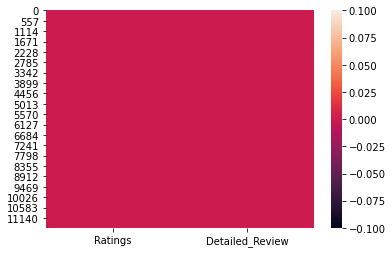

In [6]:
#Checking for missing values
import seaborn as sns
sns.heatmap(df_new.isnull())

We can see no missing values

In [7]:
# Installing gensim module
!pip install gensim

In [8]:
wordnet=WordNetLemmatizer()

In [9]:
corpus = []
for i in range(len(df_new)):
    review = re.sub('[^a-zA-Z]',' ', df_new['Detailed_Review'][i])
    review = review.lower().split()
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)


In [10]:
corpus

['good simple use battery life good charging time hour good product compair price',
 'nice',
 'great product budget phone',
 'nice product',
 'awesome product feeling happy',
 'recommended bought successfully aunt love',
 'buy phone bad camera quality',
 'super',
 'good phone budget camera ok per price performance long lasting battery go',
 'good product',
 'value money please improve camera performance',
 'happy thankful realme brand also flipkart',
 'super mobile',
 'good phone feature given phone',
 'good product',
 'good',
 'working smoothly expected',
 'buy want money wasted mp camera gimmick give worst photo pathetic camera quality expect realme',
 'ok',
 'bad',
 'phone nice camera good',
 'mobile hanging nd day',
 'bad product buy phonenetwork problem sim phone speed area',
 'nice',
 'good phone using around month performance great bgmi run without lag ultra fps lov phone need update app lock minor bug',
 'bad product dont recomment buy',
 'bad touch bad camara worth redmi',
 'b

Data is cleaned now, by removing unnecessary and common stop words present in the review

In [11]:
#Making the review into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
cv=TfidfVectorizer()
x=cv.fit_transform(corpus).toarray()

In [13]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
df_new.columns

Index(['Ratings', 'Detailed_Review'], dtype='object')

In [15]:
y=df_new['Ratings']
y

0        3
1        5
2        5
3        5
4        4
        ..
11673    4
11674    5
11675    5
11676    5
11677    1
Name: Ratings, Length: 11678, dtype: int64

In [16]:
y.value_counts()

5    6787
4    2350
1    1351
3     852
2     338
Name: Ratings, dtype: int64

In [17]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xb,yb=smt.fit_resample(x,y)

In [18]:
yb.value_counts()

5    6787
4    6787
3    6787
2    6787
1    6787
Name: Ratings, dtype: int64

Now we have the balanced dataset

In [19]:
#Importing algos & Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=0.2,random_state=45)

In [21]:
model=[MultinomialNB()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    cvscore = cross_val_score(m, xb,yb, cv=5)
    print(f'{m}:')
    print('Accuracy: ',accuracy_score(y_test,pred))
    print('Confusion Matrix: ',confusion_matrix(y_test,pred))
    print('Classification Report: ',classification_report(y_test,pred))
    print('CV score:', cvscore.mean())

MultinomialNB():
Accuracy:  0.7165168704876971
Confusion Matrix:  [[1151  105   59   48   23]
 [ 223 1097   37   49   11]
 [  57   63  909  117  173]
 [  21   32  106  880  292]
 [  14   26   81  387  826]]
Classification Report:                precision    recall  f1-score   support

           1       0.79      0.83      0.81      1386
           2       0.83      0.77      0.80      1417
           3       0.76      0.69      0.72      1319
           4       0.59      0.66      0.63      1331
           5       0.62      0.62      0.62      1334

    accuracy                           0.72      6787
   macro avg       0.72      0.71      0.72      6787
weighted avg       0.72      0.72      0.72      6787

CV score: 0.664623545012524


we can see cvscore is 0.66 & f1-score is 0.72, almost near.

Improving the model 


In [23]:
mnb=MultinomialNB()

In [24]:
#Importing Grid Search CV
from sklearn.model_selection import GridSearchCV
par={'alpha':[0,1.0,5.0,10,50.5],'fit_prior':[True,False]}
grid=GridSearchCV(mnb,param_grid=par,cv=5,verbose=2)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ............................alpha=0, fit_prior=True; total time=   4.5s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ............................alpha=0, fit_prior=True; total time=   1.7s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ............................alpha=0, fit_prior=True; total time=   1.5s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ............................alpha=0, fit_prior=True; total time=   1.4s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ............................alpha=0, fit_prior=True; total time=   1.4s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ...........................alpha=0, fit_prior=False; total time=   1.5s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ...........................alpha=0, fit_prior=False; total time=   1.4s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ...........................alpha=0, fit_prior=False; total time=   1.4s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ...........................alpha=0, fit_prior=False; total time=   1.6s


C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV] END ...........................alpha=0, fit_prior=False; total time=   1.3s
[CV] END ..........................alpha=1.0, fit_prior=True; total time=   1.4s
[CV] END ..........................alpha=1.0, fit_prior=True; total time=   1.4s
[CV] END ..........................alpha=1.0, fit_prior=True; total time=   1.4s
[CV] END ..........................alpha=1.0, fit_prior=True; total time=   1.4s
[CV] END ..........................alpha=1.0, fit_prior=True; total time=   1.4s
[CV] END .........................alpha=1.0, fit_prior=False; total time=   1.5s
[CV] END .........................alpha=1.0, fit_prior=False; total time=   1.4s
[CV] END .........................alpha=1.0, fit_prior=False; total time=   1.6s
[CV] END .........................alpha=1.0, fit_prior=False; total time=   1.5s
[CV] END .........................alpha=1.0, fit_prior=False; total time=   1.3s
[CV] END ..........................alpha=5.0, fit_prior=True; total time=   1.4s
[CV] END ...................

C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [25]:
mnb=MultinomialNB(alpha=0,fit_prior=False)
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred))
print('Confusion Matrix: ',confusion_matrix(y_test,pred))
print('Classification Report: ',classification_report(y_test,pred))

C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Accuracy:  0.7701488139089435
Confusion Matrix:  [[1233   62   30   39   22]
 [ 185 1153   27   40   12]
 [  35   54  969   92  169]
 [  16   12   76  980  247]
 [  14   20   57  351  892]]
Classification Report:                precision    recall  f1-score   support

           1       0.83      0.89      0.86      1386
           2       0.89      0.81      0.85      1417
           3       0.84      0.73      0.78      1319
           4       0.65      0.74      0.69      1331
           5       0.66      0.67      0.67      1334

    accuracy                           0.77      6787
   macro avg       0.77      0.77      0.77      6787
weighted avg       0.78      0.77      0.77      6787



accuracy improved to 77% from 72%

C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
No handles with labels found to put in legend.


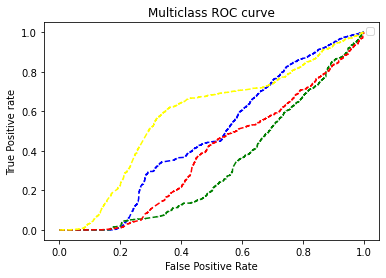

In [30]:
#AUC-ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

#predicting the probability
pred_prob=mnb.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
import random
color=['orange','blue','green','red','yellow']
# plotting 
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--',color=color[i])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [32]:
#Checking the auc_roc_score:
auc_score=roc_auc_score(y_test,mnb.predict_proba(x_test),multi_class='ovr')
auc_score

0.9550496315009853

In [33]:
mnb.score(x_train,y_train)

0.7931339325180492

In [34]:
mnb.score(x_test,y_test)

0.7701488139089435